In [286]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [287]:
#df = pd.read_csv('D:/KULIAH/PRIGEL/KODING/ANALISIS/DATASET/TWITTER/unnes27082023.csv', engine='python')
df = pd.read_csv('sentimen/Dataset/unnes30082023.csv', delimiter=';')

df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Aug 30 23:59:12 +0000 2023,1697036278372680187,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,0,8,0,2,in,1187284958370398209,1697036278372680187,unnesmenfess,https://twitter.com/unnesmenfess/status/1697036278372680187
1,Wed Aug 30 23:50:16 +0000 2023,1697034030091477126,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,2,4,0,0,in,1187284958370398209,1697034030091477126,unnesmenfess,https://twitter.com/unnesmenfess/status/1697034030091477126
2,Wed Aug 30 23:50:15 +0000 2023,1697034023191957858,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k,0,0,0,0,in,1285487290299473921,1697030059792699495,kurang1ygy,https://twitter.com/kurang1ygy/status/1697034023191957858
3,Wed Aug 30 23:45:14 +0000 2023,1697032762526712145,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,0,7,0,11,in,1187284958370398209,1697032762526712145,unnesmenfess,https://twitter.com/unnesmenfess/status/1697032762526712145
4,Wed Aug 30 23:43:25 +0000 2023,1697032303128854809,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,0,1,0,0,in,1187284958370398209,1697032303128854809,unnesmenfess,https://twitter.com/unnesmenfess/status/1697032303128854809


In [288]:
print(df.columns)

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


In [289]:
# menghapus beberapa kolom

df = df.drop(['created_at', 'id_str', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'], axis=1)
df.head()

,full_text
0,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa
1,need anjem sat set sekarangg dari gerbang utama ke fbs -ness
2,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k
3,-ness info seblak parasmanan dong😭 bm seblak dari kemarin
4,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k


In [290]:
df.isnull().sum()

full_text    0
dtype: int64

In [291]:
df.shape

(654, 1)

Data Preprocessing

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
import csv
import swifter
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk

In [293]:
def remove_punct(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub('/n', ' ',text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub(r' +', ' ',text)
    
    
    return text

pd.set_option("display.max_colwidth", -1)
df['FULL_TEXT'] = df['full_text'].apply(lambda x: remove_punct(x))
df.head(5)



,full_text,FULL_TEXT
0,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,ness ada yg bisa anjem sekitar jam 9 an driver cewe butuh yg gc plis lgsng drop wa
1,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,need anjem sat set sekarangg dari gerbang utama ke fbs ness
2,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k,mau jastip ap nder start 4k
3,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,ness info seblak parasmanan dong bm seblak dari kemarin
4,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,ness info yg jual lauk cumi cumi dong aku lagi bm soalnya amp sekalian jastipnya klo bisa 4k


CLEANING

In [294]:
#TOKENIZATION

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['TOKENIZATION'] = df['full_text'].apply(lambda x: tokenization(x.lower()))
df.head(5)

,full_text,FULL_TEXT,TOKENIZATION
0,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,ness ada yg bisa anjem sekitar jam 9 an driver cewe butuh yg gc plis lgsng drop wa,"[, ness, ada, yg, bisa, anjem, sekitar, jam, 9, an, driver, cewe, butuh, yg, gc, plis, lgsng, drop, wa]"
1,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,need anjem sat set sekarangg dari gerbang utama ke fbs ness,"[need, anjem, sat, set, sekarangg, dari, gerbang, utama, ke, fbs, ness]"
2,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k,mau jastip ap nder start 4k,"[, unnesmenfess, mau, jastip, ap, nder, https, t, co, rij4x8onzr, start, 4k]"
3,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,ness info seblak parasmanan dong bm seblak dari kemarin,"[, ness, info, seblak, parasmanan, dong, bm, seblak, dari, kemarin]"
4,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,ness info yg jual lauk cumi cumi dong aku lagi bm soalnya amp sekalian jastipnya klo bisa 4k,"[, ness, info, yg, jual, lauk, cumi, cumi, dong, aku, lagi, bm, soalnya, amp, sekalian, jastipnya, klo, bisa, 4k]"


In [295]:
#STOPREMOVAL
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('indonesian')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['STOP_REMOVAL'] = df['TOKENIZATION'].apply(lambda x: remove_stopwords(x))
df.head(5)

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,ness ada yg bisa anjem sekitar jam 9 an driver cewe butuh yg gc plis lgsng drop wa,"[, ness, ada, yg, bisa, anjem, sekitar, jam, 9, an, driver, cewe, butuh, yg, gc, plis, lgsng, drop, wa]","[, ness, yg, anjem, jam, 9, an, driver, cewe, butuh, yg, gc, plis, lgsng, drop, wa]"
1,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,need anjem sat set sekarangg dari gerbang utama ke fbs ness,"[need, anjem, sat, set, sekarangg, dari, gerbang, utama, ke, fbs, ness]","[need, anjem, sat, set, sekarangg, gerbang, utama, fbs, ness]"
2,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k,mau jastip ap nder start 4k,"[, unnesmenfess, mau, jastip, ap, nder, https, t, co, rij4x8onzr, start, 4k]","[, unnesmenfess, jastip, ap, nder, https, t, co, rij4x8onzr, start, 4k]"
3,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,ness info seblak parasmanan dong bm seblak dari kemarin,"[, ness, info, seblak, parasmanan, dong, bm, seblak, dari, kemarin]","[, ness, info, seblak, parasmanan, bm, seblak, kemarin]"
4,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,ness info yg jual lauk cumi cumi dong aku lagi bm soalnya amp sekalian jastipnya klo bisa 4k,"[, ness, info, yg, jual, lauk, cumi, cumi, dong, aku, lagi, bm, soalnya, amp, sekalian, jastipnya, klo, bisa, 4k]","[, ness, info, yg, jual, lauk, cumi, cumi, bm, amp, jastipnya, klo, 4k]"


In [296]:
#CASE FOLDING
df['FULL_TEXT'] = df['full_text'].str.lower()
df.head(5)

,full_text,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,-ness ada yg bisa anjem sekitar jam 9 an? (driver cewe) butuh yg gc plis lgsng drop wa,"[, ness, ada, yg, bisa, anjem, sekitar, jam, 9, an, driver, cewe, butuh, yg, gc, plis, lgsng, drop, wa]","[, ness, yg, anjem, jam, 9, an, driver, cewe, butuh, yg, gc, plis, lgsng, drop, wa]"
1,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,need anjem sat set sekarangg dari gerbang utama ke fbs -ness,"[need, anjem, sat, set, sekarangg, dari, gerbang, utama, ke, fbs, ness]","[need, anjem, sat, set, sekarangg, gerbang, utama, fbs, ness]"
2,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onZr start 4k,@unnesmenfess mau jastip ap nder? https://t.co/rij4x8onzr start 4k,"[, unnesmenfess, mau, jastip, ap, nder, https, t, co, rij4x8onzr, start, 4k]","[, unnesmenfess, jastip, ap, nder, https, t, co, rij4x8onzr, start, 4k]"
3,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,-ness info seblak parasmanan dong😭 bm seblak dari kemarin,"[, ness, info, seblak, parasmanan, dong, bm, seblak, dari, kemarin]","[, ness, info, seblak, parasmanan, bm, seblak, kemarin]"
4,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,-ness info yg jual lauk cumi-cumi dong aku lagi bm soalnya &amp sekalian jastipnya klo bisa 4k,"[, ness, info, yg, jual, lauk, cumi, cumi, dong, aku, lagi, bm, soalnya, amp, sekalian, jastipnya, klo, bisa, 4k]","[, ness, info, yg, jual, lauk, cumi, cumi, bm, amp, jastipnya, klo, 4k]"


In [297]:
stop_removal = df[['STOP_REMOVAL']]

def fit_stopwords(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df['STOP_REMOVAL'] = df['STOP_REMOVAL'].apply(lambda x: fit_stopwords(x))


In [298]:
# berikut adalah kamus slang words dari Meisa Putri yang saya dapat di github
key_norm = pd.read_csv('sentimen/kamus_singkatan.csv', sep=';', header=None)
key_norm.columns=['singkat','hasil']
print(key_norm.head())

key_norm.shape

   singkat     hasil
0  aamiin   amin    
1  adek     adik    
2  adlh     adalah  
3  aer      air     
4  aiskrim  es krim 


(1309, 2)

In [299]:
# buat fungsi text normalize untuk mengubah kata singkat/kata tak baku menjadi kata baku
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [300]:
df['normalization'] = df['STOP_REMOVAL'].apply(lambda x: text_normalize(x))

In [301]:
#STEMMING
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['STEMMING'] = df['normalization'].apply(lambda x: stemming(x))
df.head(5)

In [ ]:
df = df['STEMMING']
df.head(5)

0    tweet emoji                    
1    tweet isi tanda baca           
2    tweet isi url https example com
Name: STEMMING, dtype: object

In [ ]:
df.to_csv('sentimen/hasil_stemming.csv', index = False)

Lexicon Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('sentimen/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('sentimen/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 1
    elif (score < 0):
        polarity = -1
    else:
        polarity = 0
    return score, polarity

In [ ]:
df = pd.read_csv('sentimen/hasil_stemming.csv', delimiter=';')

df.head()


,STEMMING
0,tweet emoji
1,tweet isi tanda baca
2,tweet isi url https example com


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['STEMMING'] =pd.Series(df['STEMMING'],dtype="string")


In [ ]:
df['STEMMING'] = df['STEMMING'].replace(np.nan, '')

In [ ]:
df['tokenized_sents'] = df.apply(lambda row: word_tokenize(row['STEMMING']), axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STEMMING         3 non-null      string
 1   tokenized_sents  3 non-null      object
dtypes: object(1), string(1)
memory usage: 176.0+ bytes


In [ ]:
results = df['tokenized_sents'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

-1    2
 0    1
Name: polarity, dtype: int64


In [ ]:
df.head()

,STEMMING,tokenized_sents,polarity_score,polarity
0,tweet emoji,"[tweet, emoji]",0,0
1,tweet isi tanda baca,"[tweet, isi, tanda, baca]",-3,-1
2,tweet isi url https example com,"[tweet, isi, url, https, example, com]",-3,-1


In [ ]:
# Export to csv file
# df.to_csv(r'sentimen/data_label.csv', index = False, header = True,index_label=None)

# df.head()

Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style = 'whitegrid')

In [ ]:
# load data berlabel
df = pd.read_csv('sentimen/data_label.csv')

In [ ]:
df.head()

,STEMMING,tokenized_sents,polarity_score,polarity
0,ness yang anjem jam 9 an driver cewek butuh yang gc tolong langsung drop saya,"['ness', 'yang', 'anjem', 'jam', '9', 'an', 'driver', 'cewek', 'butuh', 'yang', 'gc', 'tolong', 'langsung', 'drop', 'saya']",-20,-1
1,need anjem sat set sekarangg gerbang utama fbs ness,"['need', 'anjem', 'sat', 'set', 'sekarangg', 'gerbang', 'utama', 'fbs', 'ness']",0,0
2,unnesmenfess jastip ap nder https t co rij4x8onzr start 4k,"['unnesmenfess', 'jastip', 'ap', 'nder', 'https', 't', 'co', 'rij4x8onzr', 'start', '4k']",0,0
3,ness info seblak parasmanan bm seblak kemarin,"['ness', 'info', 'seblak', 'parasmanan', 'bm', 'seblak', 'kemarin']",-3,-1
4,ness info yang jual lauk cumi cumi bm amp jastipnya kalau 4k,"['ness', 'info', 'yang', 'jual', 'lauk', 'cumi', 'cumi', 'bm', 'amp', 'jastipnya', 'kalau', '4k']",-8,-1


In [ ]:
#define negative and positive

negatif = df.loc[df['polarity'] == -1]
positif  = df.loc[df['polarity'] == 1]
netral = df.loc[df['polarity'] == 0]

In [ ]:
all_ = "".join(df.tokenized_sents.values) # untuk semua kata
all_negatif = "".join(negatif.tokenized_sents.values) # untuk kata negatif
all_positif = "".join(positif.tokenized_sents.values) # untuk kata positif
all_netral = "".join(netral.tokenized_sents.values) # untuk kata netral

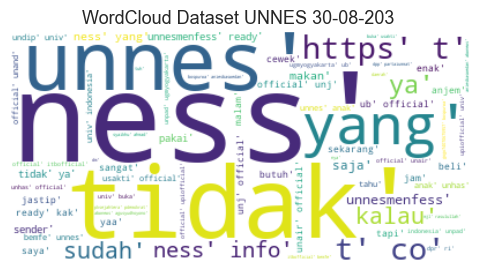

In [ ]:
# word cloud untuk semua kata

cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(all_)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Dataset UNNES 30-08-203 ', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

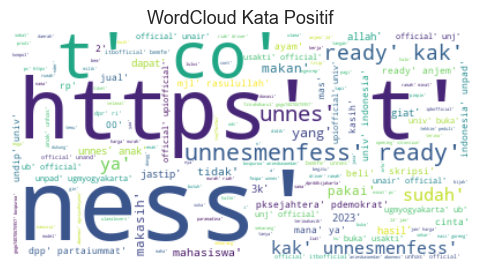

In [ ]:
# word cloud untuk kata positif

cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_positif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Positif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

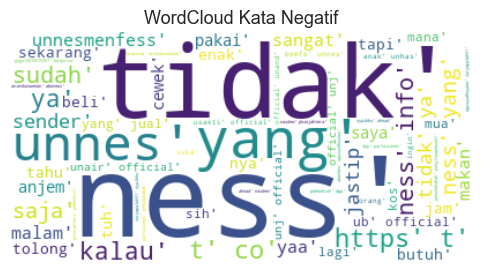

In [ ]:
# word cloud untukkata negative

cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_negatif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Negatif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

Pengujian SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('sentimen/data_label.csv', encoding='latin-1' )

df.head()

,STEMMING,tokenized_sents,polarity_score,polarity
0,ness yang anjem jam 9 an driver cewek butuh yang gc tolong langsung drop saya,"['ness', 'yang', 'anjem', 'jam', '9', 'an', 'driver', 'cewek', 'butuh', 'yang', 'gc', 'tolong', 'langsung', 'drop', 'saya']",-20,-1
1,need anjem sat set sekarangg gerbang utama fbs ness,"['need', 'anjem', 'sat', 'set', 'sekarangg', 'gerbang', 'utama', 'fbs', 'ness']",0,0
2,unnesmenfess jastip ap nder https t co rij4x8onzr start 4k,"['unnesmenfess', 'jastip', 'ap', 'nder', 'https', 't', 'co', 'rij4x8onzr', 'start', '4k']",0,0
3,ness info seblak parasmanan bm seblak kemarin,"['ness', 'info', 'seblak', 'parasmanan', 'bm', 'seblak', 'kemarin']",-3,-1
4,ness info yang jual lauk cumi cumi bm amp jastipnya kalau 4k,"['ness', 'info', 'yang', 'jual', 'lauk', 'cumi', 'cumi', 'bm', 'amp', 'jastipnya', 'kalau', '4k']",-8,-1


In [ ]:
df.describe()

,polarity_score,polarity
count,654.000000,654.000000
mean,-4.666667,-0.425076
std,8.357016,0.826280
min,-47.000000,-1.000000
25%,-9.000000,-1.000000
50%,-3.000000,-1.000000
75%,0.000000,0.000000
max,28.000000,1.000000


In [ ]:
df.isna().sum()

STEMMING           0
tokenized_sents    0
polarity_score     0
polarity           0
dtype: int64

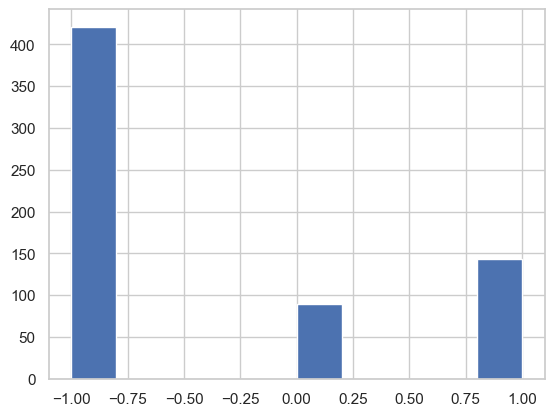

In [ ]:
plt.hist(df['polarity'])
plt.show()

In [ ]:
df['polarity'].value_counts()

-1    421
 1    143
 0    90 
Name: polarity, dtype: int64

In [ ]:
df = df[['STEMMING','polarity']]
df.head()

,STEMMING,polarity
0,ness yang anjem jam 9 an driver cewek butuh yang gc tolong langsung drop saya,-1
1,need anjem sat set sekarangg gerbang utama fbs ness,0
2,unnesmenfess jastip ap nder https t co rij4x8onzr start 4k,0
3,ness info seblak parasmanan bm seblak kemarin,-1
4,ness info yang jual lauk cumi cumi bm amp jastipnya kalau 4k,-1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['STEMMING'],df['polarity'],
                                                                    test_size=0.2,random_state=0)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['STEMMING'].values.astype('U'))
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Test_Y

array([0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0],
      dtype=int64)

TF-IDF

In [ ]:
Train_X

245    ness info kos area smp 38 semarang tidak                                                                                                                                                                                        
646    topik diskusi pagi sehat mental sosial remaja generasi muda bangsa tangguh pandang amat didik unnes yuli kurniawati sp dsc now live topik didik sel remaja tangguh cc unneskonservasi                                           
489    ness info kost cewek daerah kelud ditempatin september                                                                                                                                                                          
251    inilakh saya produktif xixixi                                                                                                                                                                                                   
34     ness pantura jam gin ramai tidak ya pulang pati btw cewek        

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['STEMMING'].values.astype('U'))

Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [ ]:
Train_X_Tfidf.shape

(523, 2581)

In [ ]:
Train_Y.shape

(523,)

In [ ]:
print("TF-IDF ", type(Test_X_Tfidf), Train_X_Tfidf.shape)

TF-IDF  <class 'scipy.sparse._csr.csr_matrix'> (523, 2581)


In [ ]:
SVM = SVC()
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10)

array([0.71698113, 0.71698113, 0.69811321, 0.73076923, 0.69230769,
       0.69230769, 0.75      , 0.73076923, 0.75      , 0.73076923])

In [ ]:
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10).mean()

0.7208998548621189

Membandingkan Kernel

1. Linier

In [ ]:
clf = SVC(kernel='linear', C=2.33)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='linear')

In [ ]:
scores = cross_val_score(clf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(clf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.73584906 0.81132075 0.73584906 0.73076923 0.75       0.63461538
 0.78846154 0.76923077 0.76923077 0.78846154]
K-Fold Mean ->  0.7513788098693759


In [ ]:
y_pred = clf.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[78  0  4]
 [13  6  1]
 [20  2  7]]
SVM Accuracy Score ->  69.46564885496184
SVM Recall Score ->  69.46564885496184
SVM Precision Score ->  69.46564885496184
SVM f1 Score ->  69.46564885496184


2. Polynomial

In [ ]:
poly = SVC(kernel='poly', C=2.33)
poly.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='poly')

In [ ]:
scores = cross_val_score(poly, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.73584906 0.73584906 0.69811321 0.73076923 0.69230769 0.67307692
 0.75       0.73076923 0.75       0.73076923]
K-Fold Mean ->  0.7227503628447025


In [ ]:
y_pred = poly.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[81  1  0]
 [19  1  0]
 [26  0  3]]
SVM Accuracy Score ->  64.8854961832061
SVM Recall Score ->  64.8854961832061
SVM Precision Score ->  64.8854961832061
SVM f1 Score ->  64.8854961832061


3. Radial Basis Function

In [ ]:
rbf = SVC(kernel='rbf', C=2.13, gamma=0.50 )
rbf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.13, gamma=0.5)

In [ ]:
scores = cross_val_score(rbf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.71698113 0.77358491 0.75471698 0.75       0.71153846 0.71153846
 0.76923077 0.73076923 0.75       0.75      ]
K-Fold Mean ->  0.7418359941944848


In [ ]:
y_pred = rbf.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[80  1  1]
 [13  6  1]
 [23  1  5]]
SVM Accuracy Score ->  69.46564885496184
SVM Recall Score ->  69.46564885496184
SVM Precision Score ->  69.46564885496184
SVM f1 Score ->  69.46564885496184


4. Sigmoid

In [ ]:
sig = SVC(kernel='sigmoid', C=2.25)
sig.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.25, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.71698113 0.75471698 0.75471698 0.75       0.75       0.63461538
 0.73076923 0.75       0.76923077 0.80769231]
K-Fold Mean ->  0.7418722786647315


In [ ]:
y_pred = sig.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[78  0  4]
 [12  6  2]
 [19  3  7]]
SVM Accuracy Score ->  69.46564885496184
SVM Recall Score ->  69.46564885496184
SVM Precision Score ->  69.46564885496184
SVM f1 Score ->  69.46564885496184


In [ ]:
def classify(tweet):
    pred  = clf.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Sentimen positif"
    elif pred == -1:
        return "Sentimen negatif"
    else :
        return "Sentimen netral"

In [ ]:
classify('ness wakamsi tutup deh sedih sangat makan enak terus pw jam gin lapar biasanga wakamsi')

'Sentimen netral'

Pengujian Naive Bayes

1. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

c = Train_X_Tfidf.toarray()

GNB = GaussianNB()
GNB.fit(c,Train_Y)

GaussianNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(GNB,c,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.58490566 0.54716981 0.64150943 0.62264151 0.73584906 0.54716981
 0.67924528 0.66037736 0.71698113 0.66037736] 

Rata-rata akurasi pada cross validation: 0.6396226415094339


In [ ]:
d = Test_X_Tfidf.toarray()

In [ ]:
%%time
GNB_pred= GNB.predict(d)
accuracy_GNB = accuracy_score(Test_Y, GNB_pred)
print(accuracy_GNB)

0.5648854961832062
CPU times: total: 0 ns
Wall time: 16 ms


In [ ]:
# confusion Matrix

cm = confusion_matrix(Test_Y, GNB_pred)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(Test_Y, GNB_pred))

print('micro Average :')
print("GaussianNB Recall Score -> ",recall_score(Test_Y, GNB_pred, average='micro')*100)
print("GaussianNB Precision Score -> ",precision_score(Test_Y, GNB_pred, average='micro')*100)
print("GaussianNB f1 Score -> ",f1_score(Test_Y, GNB_pred, average='micro')*100)

Confusion matrix:
 [[60  6 16]
 [11  6  3]
 [19  2  8]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        82
           1       0.43      0.30      0.35        20
           2       0.30      0.28      0.29        29

    accuracy                           0.56       131
   macro avg       0.46      0.44      0.45       131
weighted avg       0.55      0.56      0.55       131

micro Average :
GaussianNB Recall Score ->  56.48854961832062
GaussianNB Precision Score ->  56.48854961832062
GaussianNB f1 Score ->  56.48854961832062


2. Multinominal Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(Train_X_Tfidf,Train_Y)

MultinomialNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(MNB, Train_X_Tfidf,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.64150943 0.73584906 0.62264151 0.71698113 0.67924528 0.73584906
 0.75471698 0.75471698 0.62264151 0.62264151] 

Rata-rata akurasi pada cross validation: 0.6886792452830189


In [ ]:
%%time
MNB_pred= MNB.predict(Test_X_Tfidf)
accuracy_MNB = accuracy_score(Test_Y, MNB_pred)
print(accuracy_MNB)

0.6564885496183206
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
cm = confusion_matrix(Test_Y, MNB_pred)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(Test_Y, MNB_pred))

print('micro Average :')
print("MultinominalNB Recall Score -> ",recall_score(Test_Y, MNB_pred, average='micro')*100)
print("MultinominalNB Precision Score -> ",precision_score(Test_Y, MNB_pred, average='micro')*100)
print("MultinominalNB f1 Score -> ",f1_score(Test_Y, MNB_pred, average='micro')*100)

Confusion matrix:
 [[82  0  0]
 [19  0  1]
 [25  0  4]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        82
           1       0.00      0.00      0.00        20
           2       0.80      0.14      0.24        29

    accuracy                           0.66       131
   macro avg       0.48      0.38      0.34       131
weighted avg       0.58      0.66      0.55       131

micro Average :
MultinominalNB Recall Score ->  65.64885496183206
MultinominalNB Precision Score ->  65.64885496183206
MultinominalNB f1 Score ->  65.64885496183206


3. Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(Train_X_Tfidf,Train_Y)

BernoulliNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(BNB, Train_X_Tfidf,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.75471698 0.75471698 0.75471698 0.58490566 0.79245283 0.69811321
 0.60377358 0.75471698 0.60377358 0.64150943] 

Rata-rata akurasi pada cross validation: 0.6943396226415095


In [ ]:
%%time
BNB_pred= BNB.predict(Test_X_Tfidf)
accuracy_BNB = accuracy_score(Test_Y, BNB_pred)
print(accuracy_BNB)

0.6335877862595419
CPU times: total: 0 ns
Wall time: 2.67 ms


In [ ]:
cm = confusion_matrix(Test_Y, BNB_pred)
print('Confusion matrix:\n', cm)




print('Classification report:\n', classification_report(Test_Y, BNB_pred))

print('micro Average :')
print("BernoulliNB Recall Score -> ",recall_score(Test_Y, BNB_pred, average='micro')*100)
print("BernoulliNB Precision Score -> ",precision_score(Test_Y, BNB_pred, average='micro')*100)
print("BernoulliNB f1 Score -> ",f1_score(Test_Y, BNB_pred, average='micro')*100)

Confusion matrix:
 [[79  0  3]
 [19  0  1]
 [24  1  4]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.96      0.77        82
           1       0.00      0.00      0.00        20
           2       0.50      0.14      0.22        29

    accuracy                           0.63       131
   macro avg       0.38      0.37      0.33       131
weighted avg       0.52      0.63      0.53       131

micro Average :
BernoulliNB Recall Score ->  63.358778625954194
BernoulliNB Precision Score ->  63.358778625954194
BernoulliNB f1 Score ->  63.358778625954194


In [ ]:
print('Akurasi Naive Bayes :\n')
print('Gaussian Naive Bayes : ',accuracy_GNB )
print('Multinominal Naive Bayes : ',accuracy_MNB )
print('Bernoulli Naive Bayes : ',accuracy_BNB )

Akurasi Naive Bayes :

Gaussian Naive Bayes :  0.5648854961832062
Multinominal Naive Bayes :  0.6564885496183206
Bernoulli Naive Bayes :  0.6335877862595419
